In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df=pd.read_csv("train_data.csv")
df.head()
# ,engine='c',encoding='utf8'

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [ ]:
for i in range(len(df)):
  if df['sentiment'][i]=='Neutral':
    df['sentiment'][i]='Negative'

In [ ]:
df_t=pd.read_csv('test_data_hidden.csv')
df_t.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [ ]:
for i in range(len(df_t)):
  if df_t['sentiment'][i]=='Neutral':
    df_t['sentiment'][i]='Negative'

In [ ]:
df_t.shape

(1000, 8)

In [ ]:
print(df.count())
# print(target.count())

name                 4000
brand                4000
categories           4000
primaryCategories    4000
reviews.text         4000
sentiment            4000
dtype: int64


In [ ]:
df.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.date',
       'reviews.text', 'reviews.title', 'sentiment'],
      dtype='object')

In [ ]:
df=df.drop(['reviews.date','reviews.title'],axis=1)
df.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Negative
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Positive


In [ ]:
df.dtypes

name                 object
brand                object
categories           object
primaryCategories    object
reviews.text         object
sentiment            object
dtype: object

In [ ]:
df.describe()

,name,brand,categories,primaryCategories,reviews.text,sentiment
count,4000,4000,4000,4000,4000,4000
unique,24,1,23,4,3598,2
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,I bought this kindle for my 11yr old granddaug...,Positive
freq,675,4000,628,2600,4,3749


<Axes: xlabel='count', ylabel='sentiment'>

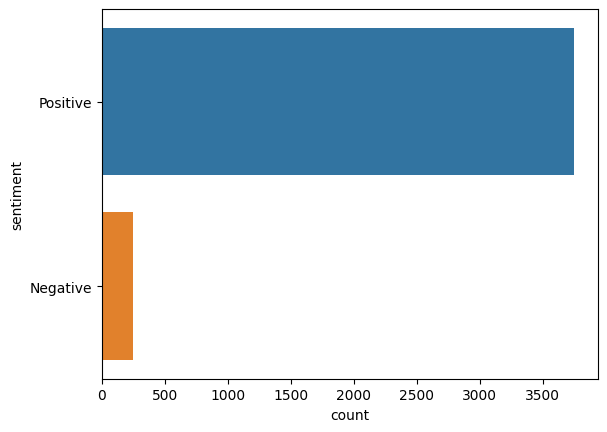

In [ ]:
sb.countplot(y=df.sentiment)

<Axes: xlabel='count', ylabel='categories'>

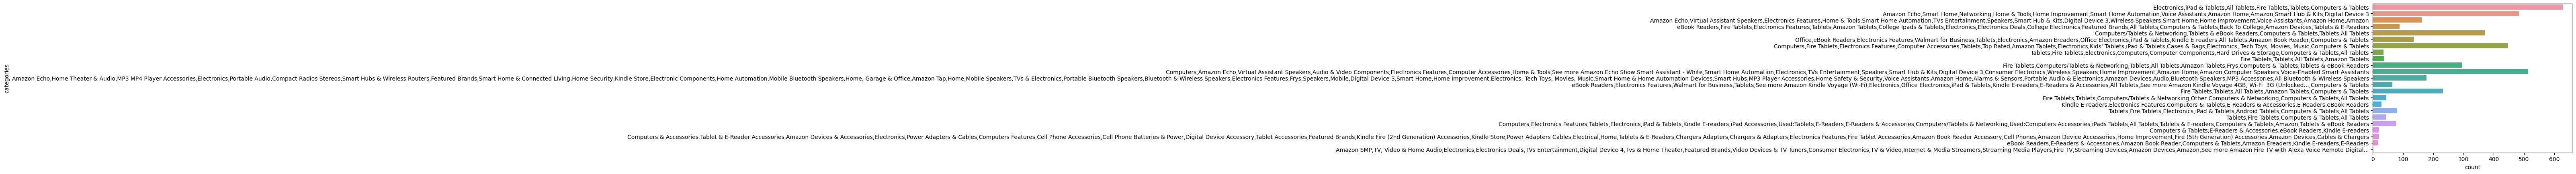

In [ ]:
sb.countplot(y=df.categories)

In [ ]:
list_Unique_categories=[]
for i in range(len(df)):
  if df['categories'][i] not in list_Unique_categories:
    list_Unique_categories.append(df['categories'][i])
# for i in range(len(list_Unique_categories)):
print(len(list_Unique_categories))

23


In [ ]:
df.sentiment.value_counts()

Positive    3749
Negative     251
Name: sentiment, dtype: int64

This is the end of Data Exploration.

This is the beginning of Data Pre-Processing

1. Removal of Stopwords

In [ ]:
df['reviews.text'] = df['reviews.text'].apply(nltk.word_tokenize)
df.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[Purchased, on, Black, FridayPros, -, Great, P...",Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware","[I, purchased, two, Amazon, in, Echo, Plus, an...",Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware","[Just, an, average, Alexa, option, ., Does, sh...",Negative
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","[very, good, product, ., Exactly, what, I, wan...",Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[This, is, the, 3rd, one, I, 've, purchased, ....",Positive


In [ ]:
new_words=[]
for i in range(len(df)):
  for j in range(len(df['reviews.text'][i])):
    if df['reviews.text'][i][j] not in new_words:
      new_words.append(df['reviews.text'][i][j])
print(len(new_words))

6541


In [ ]:
sum=0
for i in range(len(df)):
  for j in range(len(df['reviews.text'][i])):
    sum+=j
print(sum)

6528800


In [ ]:
# df=df.reset_index()
print(df.shape)

(4000, 6)


Replacing Non-ASCII characters with empty space

In [ ]:
import string
def remove_non_ascii(a_str):
    ascii_chars = set(string.printable)
    return ''.join(filter(lambda x: x in ascii_chars, a_str))

In [ ]:
XYZ=["abC",'abÄôs']
for i in range(len(XYZ)):
  print(remove_non_ascii(XYZ[i]))

abC
abs


In [ ]:
for i in range(len(df)):
  for j in range(len(df['reviews.text'][i])):
    df['reviews.text'][i][j]=remove_non_ascii(df['reviews.text'][i][j])
df.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[Purchased, on, Black, FridayPros, -, Great, P...",Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware","[I, purchased, two, Amazon, in, Echo, Plus, an...",Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware","[Just, an, average, Alexa, option, ., Does, sh...",Negative
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","[very, good, product, ., Exactly, what, I, wan...",Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[This, is, the, 3rd, one, I, 've, purchased, ....",Positive


Convert all the string to lowercase

In [ ]:
print(low_case('ABC'))

abc


In [ ]:
def low_case(string1):
  string1=string1.lower()
  return string1

In [ ]:
for i in range(len(df)):
  for j in range(len(df['reviews.text'][i])):
    df['reviews.text'][i][j]=low_case(df['reviews.text'][i][j])
df.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[purchased, on, black, fridaypros, -, great, p...",Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware","[i, purchased, two, amazon, in, echo, plus, an...",Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware","[just, an, average, alexa, option, ., does, sh...",Negative
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","[very, good, product, ., exactly, what, i, wan...",Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[this, is, the, 3rd, one, i, 've, purchased, ....",Positive


In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
puntc_list=list(string.punctuation)
print(puntc_list)
print()

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']



In [ ]:
print(punct_marks('A(B'))

AB


In [ ]:
import string
# import re
def punct_marks(s):

  # for i in range(len(string1)):
  #   # print(string1[i])
  #   if string1[i] in puntc_list:
  #     print(string1[i])
  #     string1=string1.replace(string1[i],'')
  # return string1
  # s="Hello$@ Python3&"
  f=filter(str.isalpha,s)
  s1="".join(f)
  return s1

In [ ]:
for i in range(len(df)):
  for j in range(len(df['reviews.text'][i])):
    df['reviews.text'][i][j]=punct_marks(df['reviews.text'][i][j])
df.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[purchased, on, black, fridaypros, , great, pr...",Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware","[i, purchased, two, amazon, in, echo, plus, an...",Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware","[just, an, average, alexa, option, , does, sho...",Negative
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","[very, good, product, , exactly, what, i, want...",Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[this, is, the, rd, one, i, ve, purchased, , i...",Positive


In [ ]:
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# for i in range(len(df)):
#   for j in range(len(df['reviews.text'][i])):
#     if df['reviews.text'][i][j] in stop_words:
#       df['reviews.text'][i].remove(df['reviews.text'][i][j])
# df.head()

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in range(len(df)):
  k=len(df['reviews.text'][i])
  for j in range(k):
    if j<len(df['reviews.text'][i]):
      if df['reviews.text'][i][j] in stop_words:
        df['reviews.text'][i].remove(df['reviews.text'][i][j])
df.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[purchased, black, fridaypros, , great, price,...",Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware","[purchased, two, amazon, echo, plus, two, dots...",Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware","[an, average, alexa, option, , show, few, thin...",Negative
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","[good, product, , exactly, i, wanted, , a, goo...",Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[is, rd, one, ve, purchased, , ve, bought, one...",Positive


In [ ]:
from string import digits


for i in range(len(df)):
  for j in range(len(df['reviews.text'][i])):
    remove_digits = str.maketrans('', '', digits)
    res = df['reviews.text'][i][j].translate(remove_digits)
    df['reviews.text'][i][j]=res
df.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[purchased, black, fridaypros, , great, price,...",Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware","[purchased, two, amazon, echo, plus, two, dots...",Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware","[an, average, alexa, option, , show, few, thin...",Negative
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","[good, product, , exactly, i, wanted, , a, goo...",Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[is, rd, one, ve, purchased, , ve, bought, one...",Positive


Stemming from this point onwards

In [ ]:
snow_stem = df[["reviews.text"]].copy()
port_stem = df[["reviews.text"]].copy()
lanc_stem = df[["reviews.text"]].copy()
print(snow_stem["reviews.text"][0])

['purchased', 'black', 'fridaypros', '', 'great', 'price', '', 'even', 'sale', '', 'powerful', 'fast', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', 'amazon', 'ads', '', 'amazon', 'need', 'subsidize', 'tablet', 'will', 'remove', 'adds', 'you', 'pay', '', 'inability', 'access', 'apps', 'except', 'ones', 'amazon', '', 'is', 'way', 'i', 'able', 'accomplish', 'to', 'add', 'google', 'play', 'storenet', 'is', 'great', 'tablet', 'the', 'money']


In [ ]:
from nltk.stem import SnowballStemmer
s_stem=SnowballStemmer(language='english')
for i in range(len(snow_stem["reviews.text"])):
  for j in range(len(snow_stem['reviews.text'][i])):
    snow_stem['reviews.text'][i][j]=s_stem.stem(snow_stem['reviews.text'][i][j])
snow_stem.head()

,reviews.text
0,"[purchas, black, fridaypro, , great, price, , ..."
1,"[purchas, two, amazon, echo, plus, two, dot, p..."
2,"[an, averag, alexa, option, , show, few, thing..."
3,"[good, product, , exact, i, want, , a, good, p..."
4,"[is, rd, one, ve, purchas, , ve, bought, one, ..."


In [ ]:
from nltk.stem import SnowballStemmer
s_stem=SnowballStemmer(language='english')
print(s_stem.stem(snow_stem['reviews.text'][0][0]))

purcha


In [ ]:
from nltk.stem import LancasterStemmer
L_stem=LancasterStemmer()
for i in range(len(lanc_stem["reviews.text"])):
  for j in range(len(lanc_stem['reviews.text'][i])):
    lanc_stem['reviews.text'][i][j]=L_stem.stem(lanc_stem['reviews.text'][i][j])
lanc_stem.head()

,reviews.text
0,"[purcha, black, fridaypro, , gre, pric, , ev, ..."
1,"[purcha, two, amazon, echo, plu, two, dot, plu..."
2,"[an, av, alex, opt, , show, few, thing, screen..."
3,"[good, produc, , exact, i, want, , a, good, pric]"
4,"[is, rd, on, ve, purcha, , ve, bought, on, al,..."


In [ ]:
from nltk.stem import PorterStemmer
p_stem=PorterStemmer()
for i in range(len(port_stem["reviews.text"])):
  for j in range(len(port_stem['reviews.text'][i])):
    port_stem['reviews.text'][i][j]=p_stem.stem(port_stem['reviews.text'][i][j])
port_stem.head()

,reviews.text
0,"[purcha, black, fridaypro, , gre, pric, , ev, ..."
1,"[purcha, two, amazon, echo, plu, two, dot, plu..."
2,"[an, av, alex, opt, , show, few, thing, screen..."
3,"[good, produc, , exact, i, want, , a, good, pric]"
4,"[is, rd, on, ve, purcha, , ve, bought, on, al,..."


The classification Begins here

In [ ]:
for i in range(len(snow_stem)):
  s1=' '.join(snow_stem['reviews.text'][i])
  snow_stem['reviews.text'][i]=str(s1)
snow_stem.head()

,reviews.text
0,purcha black fridaypro gre pric ev sal pow ...
1,purcha two amazon echo plu two dot plu four fi...
2,an av alex opt show few thing screen stil limit
3,good produc exact i want a good pric
4,is rd on ve purcha ve bought on al my niec o...


In [ ]:
for i in range(len(port_stem)):
  s1=' '.join(port_stem['reviews.text'][i])
  port_stem['reviews.text'][i]=str(s1)
port_stem.head()

,reviews.text
0,purcha black fridaypro gre pric ev sal pow ...
1,purcha two amazon echo plu two dot plu four fi...
2,an av alex opt show few thing screen stil limit
3,good produc exact i want a good pric
4,is rd on ve purcha ve bought on al my niec o...


In [ ]:
for i in range(len(lanc_stem)):
  s1=' '.join(lanc_stem['reviews.text'][i])
  lanc_stem['reviews.text'][i]=str(s1)
lanc_stem.head()

,reviews.text
0,purcha black fridaypro gre pric ev sal pow ...
1,purcha two amazon echo plu two dot plu four fi...
2,an av alex opt show few thing screen stil limit
3,good produc exact i want a good pric
4,is rd on ve purcha ve bought on al my niec o...


In [ ]:
snow_stem = snow_stem[0:len(snow_stem)-1]
X_primary = snow_stem['reviews.text']
# Y = snow_stem['sentiment']
cv = TfidfVectorizer()
X = cv.fit_transform(X_primary)

# X_primary = df['reviews.text']
# Y = df['sentiment']
# cv = TfidfVectorizer()
# X = cv.fit_transform(X_primary)
# # X_Tr = cv.fit_transform(X_test)
# cv1=CountVectorizer()
# X1 = cv1.fit_transform(X_primary)
# # Y1_Tr = cv1.fit_transform(X_test)
print(X)

  (0, 1726)	0.13072868378427638
  (0, 2723)	0.05357101431440875
  (0, 2580)	0.22532828455187942
  (0, 2012)	0.08935496295831609
  (0, 1168)	0.12968755814377006
  (0, 2786)	0.08257709153552482
  (0, 16)	0.22532828455187942
  (0, 2)	0.10442036890561944
  (0, 2996)	0.12156205291117889
  (0, 1438)	0.141883134720277
  (0, 1870)	0.0762510289548343
  (0, 921)	0.1637264520085315
  (0, 130)	0.09220456479545971
  (0, 11)	0.1337260306658537
  (0, 1367)	0.11365368426363555
  (0, 1949)	0.15352317064350957
  (0, 3115)	0.09531061811580308
  (0, 2226)	0.17838738626476658
  (0, 3046)	0.11987125891324087
  (0, 2666)	0.13125713444136564
  (0, 2609)	0.21470582281772793
  (0, 1783)	0.09503724296582242
  (0, 27)	0.34911892467898586
  (0, 97)	0.24523599701391574
  (0, 382)	0.22532828455187942
  :	:
  (3997, 1799)	0.07913335903954163
  (3997, 1575)	0.06640186589316745
  (3997, 68)	0.07169164047332811
  (3997, 2723)	0.17065491972061264
  (3997, 2786)	0.1315280950632137
  (3997, 1367)	0.09051331495297936
  (399

In [ ]:
cv1 = CountVectorizer()
X1 = cv1.fit_transform(X_primary)
print(X1)

  (0, 2128)	1
  (0, 301)	1
  (0, 1079)	1
  (0, 1195)	2
  (0, 2077)	1
  (0, 906)	1
  (0, 2301)	1
  (0, 2048)	1
  (0, 973)	1
  (0, 2139)	1
  (0, 586)	1
  (0, 2096)	1
  (0, 96)	1
  (0, 2506)	1
  (0, 382)	1
  (0, 97)	3
  (0, 27)	3
  (0, 1783)	1
  (0, 2609)	1
  (0, 2666)	2
  (0, 3046)	1
  (0, 2226)	1
  (0, 3115)	1
  (0, 1949)	1
  (0, 1367)	1
  :	:
  (3997, 1510)	1
  (3997, 2478)	1
  (3997, 1690)	1
  (3997, 402)	1
  (3997, 705)	1
  (3997, 2133)	1
  (3997, 319)	1
  (3997, 788)	1
  (3997, 828)	1
  (3998, 2128)	1
  (3998, 301)	1
  (3998, 97)	1
  (3998, 2666)	1
  (3998, 1438)	1
  (3998, 1011)	1
  (3998, 1575)	1
  (3998, 1767)	1
  (3998, 2772)	1
  (3998, 1016)	1
  (3998, 1244)	1
  (3998, 508)	1
  (3998, 933)	1
  (3998, 2718)	1
  (3998, 2352)	1
  (3998, 1685)	1


In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_t=pd.read_csv('test_data_hidden.csv')
df_t.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [ ]:
print(df_t.count())
# print(test_target.count())

name                 1000
brand                1000
categories           1000
primaryCategories    1000
reviews.text         1000
sentiment            1000
dtype: int64


In [ ]:
df_t.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.text',
       'sentiment'],
      dtype='object')

In [ ]:
df_t=df_t.drop(['reviews.date','reviews.title'],axis=1)
df_t.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,Amazon kindle fire has a lot of free app and c...,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",The Echo Show is a great addition to the Amazo...,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Great value from Best Buy. Bought at Christmas...,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"I use mine for email, Facebook ,games and to g...",Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",This is a fantastic item & the person I bought...,Positive


In [ ]:
df_t.dtypes

name                 object
brand                object
categories           object
primaryCategories    object
reviews.text         object
sentiment            object
dtype: object

In [ ]:
df_t.describe()

,name,brand,categories,primaryCategories,reviews.text,sentiment
count,1000,1000,1000,1000,1000,1000
unique,23,1,23,4,979,2
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,I bought the white version and have it in the ...,Positive
freq,169,1000,169,676,2,937


<Axes: xlabel='count', ylabel='sentiment'>

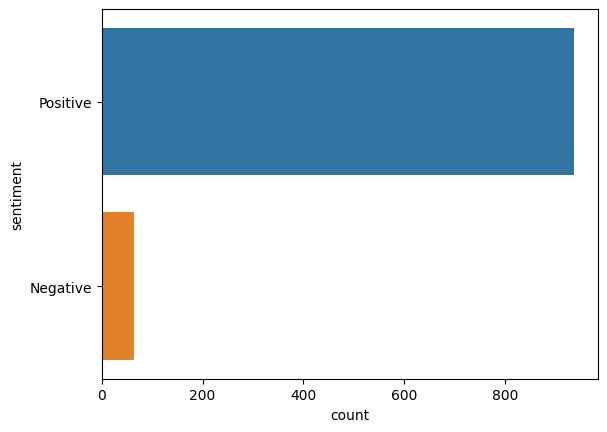

In [ ]:
sb.countplot(y=df_t.sentiment)

<Axes: xlabel='count', ylabel='categories'>

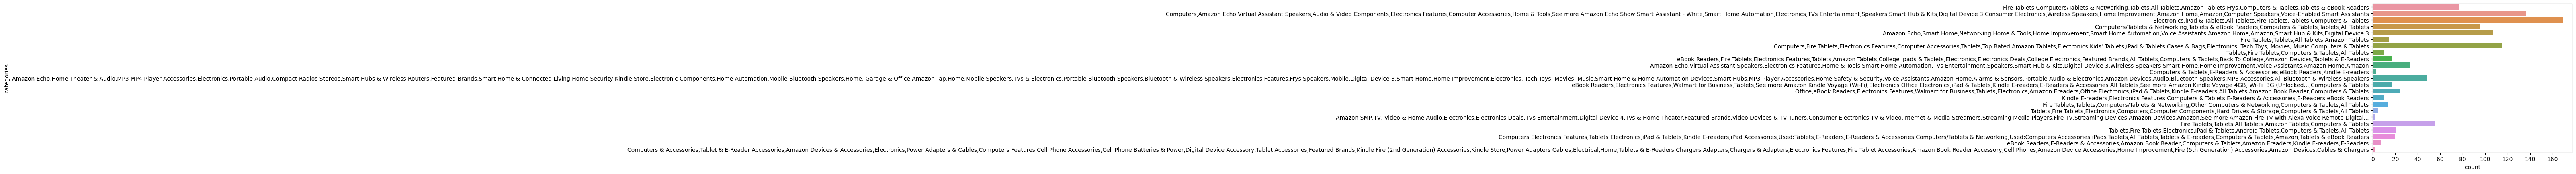

In [ ]:
sb.countplot(y=df_t.categories)

In [ ]:
list_Unique_categories_test=[]
for i in range(len(df_t)):
  if df_t['categories'][i] not in list_Unique_categories_test:
    list_Unique_categories_test.append(df_t['categories'][i])
print(len(list_Unique_categories_test))

23


In [ ]:
df_t.sentiment.value_counts()

Positive    937
Negative     63
Name: sentiment, dtype: int64

In [ ]:
df_t['reviews.text'] = df_t['reviews.text'].apply(nltk.word_tokenize)
df_t.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,"[Amazon, kindle, fire, has, a, lot, of, free, ...",Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[The, Echo, Show, is, a, great, addition, to, ...",Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[Great, value, from, Best, Buy, ., Bought, at,...",Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[I, use, mine, for, email, ,, Facebook, ,, gam...",Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[This, is, a, fantastic, item, &, the, person,...",Positive


In [ ]:
new_words_test=[]
for i in range(len(df_t)):
  for j in range(len(df_t['reviews.text'][i])):
    if df_t['reviews.text'][i][j] not in new_words_test:
      new_words_test.append(df_t['reviews.text'][i][j])
print(len(new_words_test))

3515


In [ ]:
print(len(df_t))

1000


In [ ]:
sum=0
for i in range(len(df_t)):
  for j in range(len(df_t['reviews.text'][i])):
    sum+=j
print(sum)

3073105


In [ ]:
for i in range(len(df_t)):
  for j in range(len(df_t['reviews.text'][i])):
    df_t['reviews.text'][i][j]=remove_non_ascii(df_t['reviews.text'][i][j])
df_t.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,"[Amazon, kindle, fire, has, a, lot, of, free, ...",Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[The, Echo, Show, is, a, great, addition, to, ...",Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[Great, value, from, Best, Buy, ., Bought, at,...",Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[I, use, mine, for, email, ,, Facebook, ,, gam...",Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[This, is, a, fantastic, item, &, the, person,...",Positive


In [ ]:
# def low_case(string):
#   for i in range(len(string)):
#     string[i]=string[i].lower()
#   return string

In [ ]:
for i in range(len(df_t)):
  for j in range(len(df_t['reviews.text'][i])):
    df_t['reviews.text'][i][j]=low_case(df_t['reviews.text'][i][j])
df_t.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,"[amazon, kindle, fire, has, a, lot, of, free, ...",Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[the, echo, show, is, a, great, addition, to, ...",Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[great, value, from, best, buy, ., bought, at,...",Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[i, use, mine, for, email, ,, facebook, ,, gam...",Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[this, is, a, fantastic, item, &, the, person,...",Positive


In [ ]:
for i in range(len(df_t)):
  for j in range(len(df_t['reviews.text'][i])):
    df_t['reviews.text'][i][j]=punct_marks(df_t['reviews.text'][i][j])
df_t.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,"[amazon, kindle, fire, has, a, lot, of, free, ...",Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[the, echo, show, is, a, great, addition, to, ...",Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[great, value, from, best, buy, , bought, at, ...",Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[i, use, mine, for, email, , facebook, , games...",Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[this, is, a, fantastic, item, , the, person, ...",Positive


In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in range(len(df_t)):
  k=len(df_t['reviews.text'][i])
  for j in range(k):
    if j<len(df_t['reviews.text'][i]):
      if df_t['reviews.text'][i][j] in stop_words:
        df_t['reviews.text'][i].remove(df_t['reviews.text'][i][j])
df_t.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,"[amazon, kindle, fire, a, lot, free, app, can,...",Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[echo, show, great, addition, amazon, family, ...",Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[great, value, best, buy, , bought, christmas,...",Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[use, mine, email, , facebook, , games, to, go...",Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[is, fantastic, item, , person, bought, for, l...",Positive


In [ ]:
from string import digits
for i in range(len(df_t)):
  for j in range(len(df_t['reviews.text'][i])):
    remove_digits1 = str.maketrans('', '', digits)
    res = df_t['reviews.text'][i][j].translate(remove_digits1)
    df_t['reviews.text'][i][j]=res
df_t.head()

,name,brand,categories,primaryCategories,reviews.text,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,"[amazon, kindle, fire, a, lot, free, app, can,...",Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[echo, show, great, addition, amazon, family, ...",Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,"[great, value, best, buy, , bought, christmas,...",Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"[use, mine, email, , facebook, , games, to, go...",Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware","[is, fantastic, item, , person, bought, for, l...",Positive


In [ ]:
snow_stem_t = df_t[["reviews.text"]].copy()
port_stem_t = df_t[["reviews.text"]].copy()
lanc_stem_t = df_t[["reviews.text"]].copy()
print(snow_stem_t["reviews.text"][0])

['amazon', 'kindle', 'fire', 'a', 'lot', 'free', 'app', 'can', 'used', 'any', 'one', 'wants', 'get', 'online', 'anywhere']


In [ ]:
from nltk.stem import SnowballStemmer
s_stemt=SnowballStemmer(language='english')
for i in range(len(snow_stem_t["reviews.text"])):
  for j in range(len(snow_stem_t['reviews.text'][i])):
    snow_stem_t['reviews.text'][i][j]=s_stemt.stem(snow_stem_t['reviews.text'][i][j])
snow_stem_t.head()

,reviews.text
0,"[amazon, kindl, fire, a, lot, free, app, can, ..."
1,"[echo, show, great, addit, amazon, famili, , w..."
2,"[great, valu, best, buy, , bought, christma, s..."
3,"[use, mine, email, , facebook, , game, to, go,..."
4,"[is, fantast, item, , person, bought, for, lov..."


In [ ]:
from nltk.stem import LancasterStemmer
L_stemt=LancasterStemmer()
for i in range(len(lanc_stem_t["reviews.text"])):
  for j in range(len(lanc_stem_t['reviews.text'][i])):
    lanc_stem_t['reviews.text'][i][j]=L_stemt.stem(lanc_stem_t['reviews.text'][i][j])
lanc_stem_t.head()

,reviews.text
0,"[amazon, kindl, fir, a, lot, fre, ap, can, us,..."
1,"[echo, show, gre, addit, amazon, famil, , work..."
2,"[gre, valu, best, buy, , bought, christma, sal, ]"
3,"[us, min, email, , facebook, , gam, to, go, li..."
4,"[is, fantast, item, , person, bought, for, lov, ]"


In [ ]:
from nltk.stem import PorterStemmer
p_stemt=PorterStemmer()
for i in range(len(port_stem_t["reviews.text"])):
  for j in range(len(port_stem_t['reviews.text'][i])):
    port_stem_t['reviews.text'][i][j]=p_stemt.stem(port_stem_t['reviews.text'][i][j])
port_stem_t.head()

,reviews.text
0,"[amazon, kindl, fir, a, lot, fre, ap, can, us,..."
1,"[echo, show, gre, addit, amazon, famil, , work..."
2,"[gre, valu, best, buy, , bought, christma, sal, ]"
3,"[us, min, email, , facebook, , gam, to, go, li..."
4,"[is, fantast, item, , person, bought, for, lov, ]"


In [ ]:
for i in range(len(snow_stem_t)):
  s1=' '.join(snow_stem_t['reviews.text'][i])
  snow_stem_t['reviews.text'][i]=str(s1)
snow_stem_t.head()

,reviews.text
0,amazon kindl fir a lot fre ap can us an on wan...
1,echo show gre addit amazon famil work lik the...
2,gre valu best buy bought christma sal
3,us min email facebook gam to go lin also do...
4,is fantast item person bought for lov


In [ ]:
for i in range(len(port_stem_t)):
  s1=' '.join(port_stem_t['reviews.text'][i])
  port_stem_t['reviews.text'][i]=str(s1)
port_stem_t.head()

,reviews.text
0,amazon kindl fir a lot fre ap can us an on wan...
1,echo show gre addit amazon famil work lik the...
2,gre valu best buy bought christma sal
3,us min email facebook gam to go lin also do...
4,is fantast item person bought for lov


In [ ]:
for i in range(len(lanc_stem_t)):
  s1=' '.join(lanc_stem_t['reviews.text'][i])
  lanc_stem_t['reviews.text'][i]=str(s1)
lanc_stem_t.head()

,reviews.text
0,amazon kindl fir a lot fre ap can us an on wan...
1,echo show gre addit amazon famil work lik the...
2,gre valu best buy bought christma sal
3,us min email facebook gam to go lin also do...
4,is fantast item person bought for lov


In [ ]:
Y=df['sentiment']
Y.shape

(4000,)

In [ ]:
df.shape

(4000, 6)

In [ ]:
Y_test=df_t['sentiment']
Y_test.shape

(1000,)

In [ ]:
df_t.shape

(1000, 6)

In [ ]:
snow_stem_t = snow_stem_t[0:len(snow_stem_t)-1]

X_primary1 = snow_stem_t['reviews.text']
# Y = snow_stem['sentiment']
# cv = TfidfVectorizer()
X_test = cv.transform(X_primary1)

In [ ]:
print(X_test)

  (0, 2980)	0.2571048944803711
  (0, 2917)	0.15359680996370895
  (0, 1874)	0.35961859621613157
  (0, 1870)	0.1972992362315336
  (0, 1612)	0.2765140566809926
  (0, 1499)	0.2130872712755622
  (0, 1125)	0.23139470106831253
  (0, 1072)	0.330479576085454
  (0, 1011)	0.24028438999927015
  (0, 411)	0.24474572169388387
  (0, 130)	0.2385789472032009
  (0, 129)	0.41458975177360435
  (0, 109)	0.257382145482977
  (0, 97)	0.21151572453308143
  (1, 3122)	0.18553282201339222
  (1, 3072)	0.31278434298825136
  (1, 3057)	0.14677458855403958
  (1, 2949)	0.27127144564611544
  (1, 2723)	0.06768464081263145
  (1, 2555)	0.16516999200194218
  (1, 2501)	0.12720482818693035
  (1, 2494)	0.2084762025375721
  (1, 2462)	0.15000645131541418
  (1, 2404)	0.12282043326927035
  (1, 2351)	0.18902028682715447
  :	:
  (997, 87)	0.13179038816262656
  (997, 25)	0.12737997385260286
  (998, 3009)	0.21451516058870013
  (998, 2969)	0.13194295674311884
  (998, 2792)	0.2574625570584595
  (998, 2721)	0.15946237172452757
  (998, 237

In [ ]:
X_test1 = cv1.transform(X_primary1)

In [ ]:
print(X_test1)

  (0, 97)	1
  (0, 109)	1
  (0, 129)	1
  (0, 130)	1
  (0, 411)	1
  (0, 1011)	1
  (0, 1072)	1
  (0, 1125)	1
  (0, 1499)	1
  (0, 1612)	1
  (0, 1870)	1
  (0, 1874)	1
  (0, 2917)	1
  (0, 2980)	1
  (1, 30)	2
  (1, 97)	2
  (1, 151)	1
  (1, 360)	1
  (1, 409)	1
  (1, 487)	1
  (1, 739)	1
  (1, 816)	1
  (1, 832)	2
  (1, 922)	1
  (1, 962)	1
  :	:
  (997, 3015)	1
  (997, 3123)	1
  (998, 210)	1
  (998, 301)	1
  (998, 515)	1
  (998, 593)	1
  (998, 634)	1
  (998, 751)	1
  (998, 1078)	1
  (998, 1125)	1
  (998, 1438)	1
  (998, 1443)	1
  (998, 1516)	1
  (998, 1840)	1
  (998, 1864)	1
  (998, 1970)	1
  (998, 2077)	1
  (998, 2183)	1
  (998, 2298)	1
  (998, 2301)	1
  (998, 2375)	1
  (998, 2721)	1
  (998, 2792)	1
  (998, 2969)	1
  (998, 3009)	1


In [ ]:
# Y=df[['sentiment']]
Y.shape

(3999, 1)

In [ ]:
Y_test=df_t[['sentiment']]
Y_test.shape

(1000, 1)

In [ ]:
Y_test=Y_test[0:len(Y_test)-1]
Y_test.shape

(999, 1)

In [ ]:
df.shape

(4000, 6)

In [ ]:
Y=df['sentiment']
Y.shape

(4000,)

In [ ]:
X1.shape

(3999, 3130)

In [ ]:
X.shape

(3999, 3130)

In [ ]:
Y=Y[0:len(Y)-1]

###Multinomial Naive-Bayes

The below Section Represents the MNB ML Technique with CountVectorizer

In [ ]:
M_nb1 = MultinomialNB()
M_nb1.fit(X1,Y)
pred_y=M_nb1.predict(X_test1)
accuracy = metrics.accuracy_score(pred_y,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(accuracy)

0.9459459459459459


The below Section Represents the MNB ML Technique with TFIDF Vectorizer

In [ ]:
M_nb2 = MultinomialNB()
M_nb2.fit(X,Y)
pred_y1=M_nb2.predict(X_test)
accuracy1 = metrics.accuracy_score(pred_y1,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(accuracy,accuracy1)

0.9459459459459459 0.9369369369369369


In [ ]:
from sklearn.svm import SVC

###SVM

The below Section Represents the SVM ML Technique with TFIDF Vectorizer

In [ ]:
SVM1 = SVC(kernel = 'linear', probability=True)
SVM1.fit(X,Y)
pred_y_SVM=SVM1.predict(X_test)
accuracy = metrics.accuracy_score(pred_y_SVM,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The below Section Represents the SVM ML Technique with CountVectorizer

In [ ]:
SVM2 = SVC(kernel = 'linear', probability=True)
SVM2.fit(X1,Y)
pred_y_SVM1=SVM2.predict(X_test1)
accuracy1 = metrics.accuracy_score(pred_y_SVM1,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(accuracy)

0.943943943943944


In [ ]:
print(accuracy1)

0.9419419419419419


###K-NN

K-NN using TFIDF for various K neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Accuracy_TFIDF_KNN=[]
for i in range(1,100,1):
  K_NN_Clf=KNeighborsClassifier(n_neighbors=i)
  K_NN_Clf.fit(X,Y)
  y_pred_kNN=K_NN_Clf.predict(X_test)
  print(metrics.accuracy_score(Y_test,y_pred_kNN,normalize=True))
  Accuracy_TFIDF_KNN.append(metrics.accuracy_score(Y_test,y_pred_kNN,normalize=True))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9379379379379379


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9259259259259259


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.938938938938939


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.93993993993994


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9409409409409409


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9429429429429429


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.938938938938939


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.93993993993994


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9379379379379379


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.938938938938939


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9379379379379379


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9379379379379379


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9379379379379379


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9379379379379379


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


In [ ]:
print(max(Accuracy_TFIDF_KNN))

0.9429429429429429


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_val=[]
for i in range(1,100,1):
  x_val.append(i)

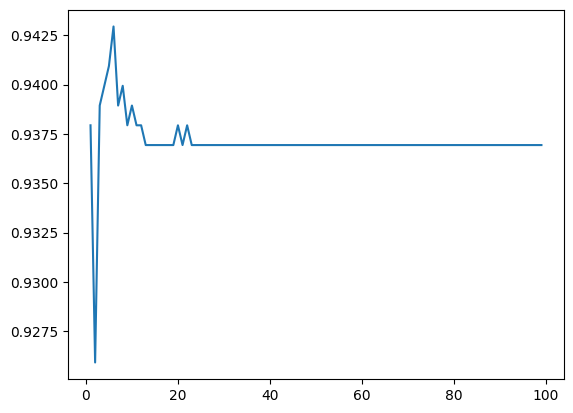

In [ ]:
plt.plot(x_val,Accuracy_TFIDF_KNN)

K-NN using CountVectorizer for various K neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Accuracy_CV_KNN=[]
for i in range(1,100,1):
  K_NN_Clf1=KNeighborsClassifier(n_neighbors=i)
  K_NN_Clf1.fit(X1,Y)
  y_pred_kNN1=K_NN_Clf1.predict(X_test1)
  print(metrics.accuracy_score(Y_test,y_pred_kNN1,normalize=True))
  Accuracy_CV_KNN.append(metrics.accuracy_score(Y_test,y_pred_kNN1,normalize=True))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.933933933933934


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9039039039039038


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9379379379379379


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9379379379379379


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9369369369369369


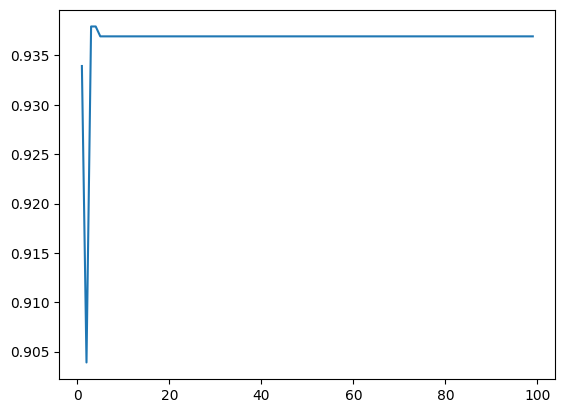

In [ ]:
plt.plot(x_val,Accuracy_CV_KNN)

###MLP Classifer


Using TFIDF Vectorizer


In [ ]:
accuracy_mlp_tf=[]
for i in range(1,15):
  l1=[]
  for j in range(1,10):
    MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i,j,),random_state=1, activation='relu', max_iter=100)
    MLP.fit(X,Y)
    pred_y_MLP = MLP.predict(X_test)
    l1.append(metrics.accuracy_score(pred_y_MLP,Y_test))
  accuracy_mlp_tf.append(l1)
print(accuracy_mlp_tf)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

[[0.9369369369369369, 0.9369369369369369, 0.9429429429429429, 0.9369369369369369, 0.938938938938939, 0.9429429429429429, 0.9369369369369369, 0.943943943943944, 0.9459459459459459], [0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9459459459459459, 0.9369369369369369, 0.9419419419419419, 0.9459459459459459, 0.9479479479479479, 0.9369369369369369], [0.9369369369369369, 0.9409409409409409, 0.9369369369369369, 0.9369369369369369, 0.9359359359359359, 0.9469469469469469, 0.944944944944945, 0.938938938938939, 0.934934934934935], [0.9459459459459459, 0.9369369369369369, 0.9369369369369369, 0.9419419419419419, 0.93993993993994, 0.944944944944945, 0.943943943943944, 0.9409409409409409, 0.9409409409409409], [0.9429429429429429, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9369369369369369, 0.9459459459459459, 0.9329329329329329, 0.9469469469469469, 0.9459459459459459], [0.9369369369369369, 0.9459459459459459, 0.943943943943944, 0.9429429429429429, 0.943943943943944,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
x_val=[]
for i in range(1,10,1):
  x_val.append(i)
x_val

[1, 2, 3, 4, 5, 6, 7, 8, 9]

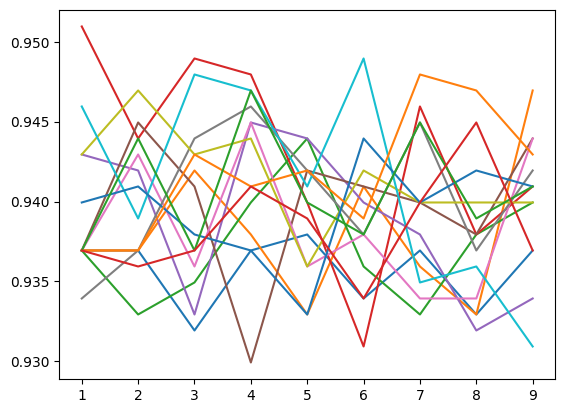

In [ ]:
for i in range(14):
  plt.plot(x_val,accuracy_mlp_tf[i])

Using CountVectorizer

In [ ]:
accuracy_mlp_tf=[]
for i in range(1,15):
  l1=[]
  for j in range(1,10):
    MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i,j,),random_state=1, activation='relu', max_iter=100)
    MLP.fit(X1,Y)
    pred_y_MLP = MLP.predict(X_test1)
    l1.append(metrics.accuracy_score(pred_y_MLP,Y_test))
  accuracy_mlp_tf.append(l1)
print(accuracy_mlp_tf)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

[[0.9369369369369369, 0.9369369369369369, 0.9319319319319319, 0.9369369369369369, 0.9379379379379379, 0.933933933933934, 0.9369369369369369, 0.9329329329329329, 0.9369369369369369], [0.9369369369369369, 0.9369369369369369, 0.9419419419419419, 0.9379379379379379, 0.9329329329329329, 0.9409409409409409, 0.9359359359359359, 0.9329329329329329, 0.9469469469469469], [0.9369369369369369, 0.9329329329329329, 0.934934934934935, 0.93993993993994, 0.943943943943944, 0.9359359359359359, 0.9329329329329329, 0.9379379379379379, 0.93993993993994], [0.950950950950951, 0.943943943943944, 0.948948948948949, 0.9479479479479479, 0.93993993993994, 0.9309309309309309, 0.9459459459459459, 0.9379379379379379, 0.9409409409409409], [0.9429429429429429, 0.9419419419419419, 0.9329329329329329, 0.944944944944945, 0.943943943943944, 0.93993993993994, 0.9379379379379379, 0.9319319319319319, 0.933933933933934], [0.9369369369369369, 0.944944944944945, 0.9409409409409409, 0.92992992992993, 0.9419419419419419, 0.940940

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18)
RFclf.fit(X,Y)
pred_y_RF=RFclf.predict(X_test)
print(metrics.accuracy_score(pred_y_RF,Y_test))

<ipython-input-314-7e9bf4410d42>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFclf.fit(X,Y)


0.9369369369369369


In [ ]:
RFclf1 = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18)
RFclf1.fit(X1,Y)
pred_y_RF1=RFclf.predict(X_test1)
print(metrics.accuracy_score(pred_y_RF1,Y_test))

<ipython-input-315-bd542504e6ee>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFclf1.fit(X1,Y)


0.9369369369369369


In [ ]:
print(pred_y_MLP1)

['Positive' 'Positive' 'Neutral' 'Positive' 'Positive' 'Positive'
 'Neutral' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive']


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(pred_y_RF1,Y)
sb.heatmap(cm,
            annot=True,
            fmt='b',
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, pred_y_RF1)))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, pred_y_RF1, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, pred_y_RF1, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, pred_y_RF1, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, pred_y_RF1, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, pred_y_RF1, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, pred_y_RF1, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, pred_y_RF1, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, pred_y_RF1, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, pred_y_RF1, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, pred_y_RF1,))


Accuracy: 0.94

Micro Precision: 0.94
Micro Recall: 0.94
Micro F1-score: 0.94

Macro Precision: 0.47
Macro Recall: 0.50
Macro F1-score: 0.48

Weighted Precision: 0.89
Weighted Recall: 0.94
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.94      1.00      0.97        16

    accuracy                           0.94        17
   macro avg       0.47      0.50      0.48        17
weighted avg       0.89      0.94      0.91        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefined